## Option 1: Pyber

You've since been given access to the company's complete recordset of rides. This contains information about every active 
driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship 
between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, 
    Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [142]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride, city, on="city", how="left")

# Display the data table for preview
df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [181]:
# Arrange data for graphing by calculating required values in new dataframe

trip_counter = df.groupby(by=['city'])['fare'].count().reset_index(name="total_trips")
fare_total = df.groupby(by=['city', 'type'])['fare'].sum().reset_index(name="fare_total")
driver_count_total = df.groupby(by=['city'])['driver_count'].first().reset_index(name="driver_count_total")
city_combine = pd.merge(trip_counter, fare_total, on="city", how="left")
city_combine['fare_average'] = city_combine['fare_total']/city_combine['total_trips']
city_total = pd.merge(city_combine, driver_count_total, on="city", how="left")
city_total.head()


,city,total_trips,type,fare_total,fare_average,driver_count_total
0,Amandaburgh,18,Urban,443.55,24.641667,12
1,Barajasview,22,Urban,557.31,25.332273,26
2,Barronchester,16,Suburban,582.76,36.422500,11
3,Bethanyland,18,Suburban,593.21,32.956111,22
4,Bradshawfurt,10,Rural,400.64,40.064000,7


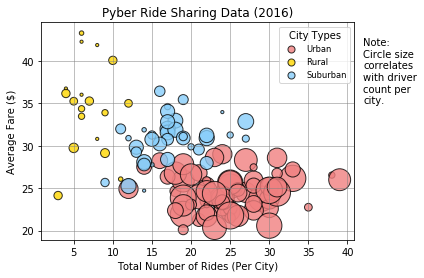

In [179]:
# Obtain the x and y coordinates for each of the three city types

urban = city_total[city_total["type"]=="Urban"]
suburban = city_total[city_total["type"]=="Suburban"]
rural = city_total[city_total["type"]=="Rural"]

# Build the scatter plots for each city types
# The size of each point on our plot is determined by their x value
# Incorporate the other graph properties

plt.scatter(urban['total_trips'], 
            urban['fare_average'], 
            s=10*urban['driver_count_total'], 
            c='lightcoral', 
            label = "Urban",
            alpha=0.8,
            edgecolors='black',
            linewidths=1,
            marker = "o")

plt.scatter(rural['total_trips'],
            rural['fare_average'],
            s=10*rural['driver_count_total'],
            c='gold',
            label = "Rural",
            alpha=0.8,
            edgecolors='black',
            linewidths=1,
            marker = "o")

plt.scatter(suburban['total_trips'], 
            suburban['fare_average'], 
            s=10*suburban['driver_count_total'], 
            c='lightskyblue', 
            label = "Suburban",
            alpha=0.8,
            edgecolors='black',
            linewidths=1,
            marker = "o")

# Create a legend
# Incorporate a text label regarding circle size

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.text(42,35,"Note:\nCircle size\ncorrelates\nwith driver\ncount per\ncity.")

lgnd = plt.legend(fontsize = 'small', loc = 'best', title = "City Types", mode = 'expanded', scatterpoints = 1, labelspacing =0.5)

for l in lgnd.legendHandles:
    l._sizes = [50]
    
# Save Figure
### Adjusted plot and note length to avoid cutting off the words in the png file 
plt.subplots_adjust(right=0.85) 
plt.savefig('RideShareDataBubblePlot.png', dpi = 100)

# Show plot
plt.show()





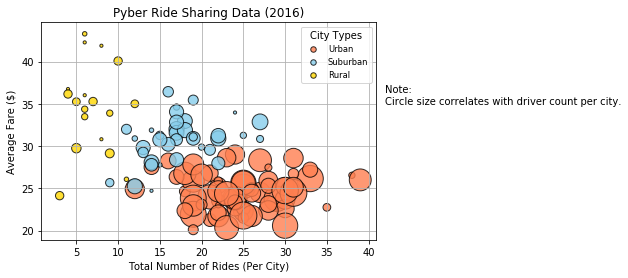

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [145]:
# Calculate Type Percents
typefare_total = city_total.groupby(by=['type'])['fare_total'].sum().reset_index(name="typefare_total")
typefare_total

,type,typefare_total
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


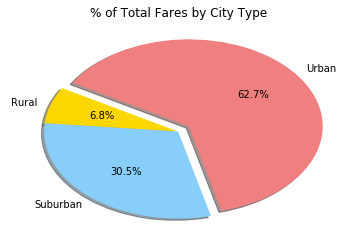

In [146]:
# Build Pie Chart

plt.title('% of Total Fares by City Type')

# Labels for the sections of our pie chart
labels = typefare_total['type']

# The values of each section of the pie chart
sizes = typefare_total['typefare_total']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()

# Save Figure

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('Fare_By_City_Type.pdf') as pdf:
    plt.title('% of Total Fares by City Type')
    labels = typefare_total['type']
    sizes = typefare_total['typefare_total']
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0, 0, 0.1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()


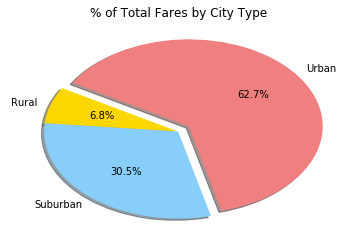

In [4]:
# Show Comparison Figure - only works if kernal not cleared
plt.show()

## Total Rides by City Type

In [147]:
# Calculate Ride Percents
typeride_total = city_total.groupby(by=['type'])['total_trips'].sum().reset_index(name="typeride_total")
typeride_total

,type,typeride_total
0,Rural,125
1,Suburban,625
2,Urban,1625


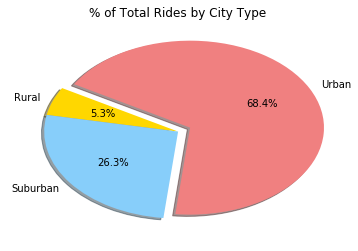

In [148]:
# Build Pie Chart

plt.title('% of Total Rides by City Type')

# Labels for the sections of our pie chart
labels = typeride_total['type']

# The values of each section of the pie chart
sizes = typeride_total['typeride_total']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()

# Save Figure

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('Rides_By_City_Type.pdf') as pdf:
    plt.title('% of Total Rides by City Type')
    labels = typeride_total['type']
    sizes = typeride_total['typeride_total']
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0, 0, 0.1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()



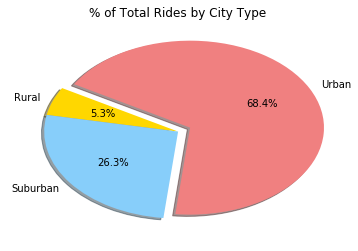

In [5]:
# Show Comparison Figure - only works if kernal not cleared
plt.show()

## Total Drivers by City Type

In [149]:
# Calculate Driver Percents
typedriver_total = city_total.groupby(by=['type'])['driver_count_total'].sum().reset_index(name="typedriver_total")
typedriver_total

,type,typedriver_total
0,Rural,78
1,Suburban,490
2,Urban,2405


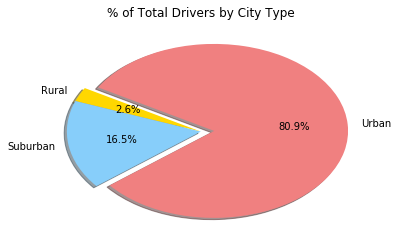

In [155]:
# Build Pie Chart

plt.title('% of Total Drivers by City Type')

# Labels for the sections of our pie chart
labels = typedriver_total['type']

# The values of each section of the pie chart
sizes = typedriver_total['typedriver_total']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()

# Save Figure

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('Drivers_By_City_Type.pdf') as pdf:
    plt.title('% of Total Drivers by City Type')
    labels = typedriver_total['type']
    sizes = typedriver_total['typedriver_total']
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0, 0, 0.1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()


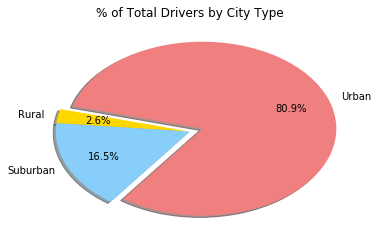

In [6]:
# Show Comparison Figure - only works if kernal not cleared
plt.show()

You must include a written description of three observable trends based on the data.

* Pyber operates mostly in urban markets (68% of rides), even though the US population is majority suburban (http://www.pewsocialtrends.org); possible explanations are that suburbanites are more likely to own cars, or that Pyber has less coverage in non-urban locations
* Rural fares tend to be more expensive; could be a factor of distance (miles per fare would be a useful additional data set) or 'surge' pricing due to scarcity of drivers (would also need additional data on pricing to confirm, could calc $/mi using milage data set above).
* There is a high density of drivers in urban areas (80% drivers are urban but only 68% of rides are urban)